In [2]:
import pandas as pd

In [3]:
url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [5]:
# using .groupby
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [4]:
# here we are accessing all of Africa in the column "continent
drinks[drinks.continent=='Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [5]:
drinks[drinks.continent=='Africa'].mean()

beer_servings                   61.471698
spirit_servings                 16.339623
wine_servings                   16.264151
total_litres_of_pure_alcohol     3.007547
dtype: float64

In [6]:
drinks[drinks.continent=='Africa'].wine_servings.mean()


16.264150943396228

In [7]:
drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

groupby max and min

In [8]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [9]:
drinks.groupby('continent').wine_servings.min()

continent
Africa           0
Asia             0
Europe           0
North America    1
Oceania          0
South America    1
Name: wine_servings, dtype: int64

# Aggregate findings

In [10]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])


,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [11]:
#You can get mean of all numeric columns as well
drinks.groupby('continent').mean()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [12]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [13]:
# .loc is a DataFrame method
# format of .loc
# .loc['index_name_or_number', 'column_name]
drinks.describe().loc['25%', 'beer_servings']

20.0

In [14]:
drinks.describe().loc['max', 'wine_servings']

370.0

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

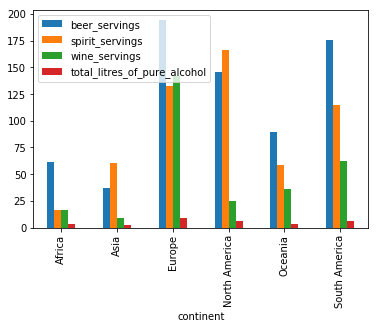

In [16]:
data = drinks.groupby('continent').mean()
data.plot(kind='bar')

In [17]:
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [18]:
ufo.isnull().sum()


City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [19]:
# this allows us to see the total rows of missing values in the column City
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [20]:
ufo.shape

(18241, 5)

In [21]:
# drop rows if any of the 5 columns have a missing value
# how='any' is the default, you need not include this
ufo.dropna(how='any').shape

(2486, 5)

In [22]:
# you can change using inplace='true'
ufo.dropna(how='any', inplace=True)
ufo.shape

(2486, 5)

In [23]:
# drop row if all of the columns are missing
ufo.dropna(how='all').shape

(2486, 5)

In [24]:
# drop row if either City or Shape Reported are missing
ufo.dropna(subset=['City', 'Shape Reported'], how='all')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00


# Multiple criteria Filtering

In [25]:
url = 'http://bit.ly/imdbratings'

# Create movies DataFrame
movies = pd.read_csv(url)

In [26]:
movies[movies.duration >= 220]


,star_rating,title,content_rating,genre,duration,actors_list
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [27]:
# when you wrap conditions in parantheses, you give order
# you do those in brackets first before 'and'
# AND
movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [28]:
# OR 
movies[(movies.duration >= 200) | (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
22,8.7,It's a Wonderful Life,APPROVED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."


# What if you want genres crime, drama, and action?

In [29]:
# slow method
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [30]:
# fast method
filter_list = ['Crime', 'Drama', 'Action']
movies[movies.genre.isin(filter_list)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


# sorting on categorical variable

In [31]:
id_list =[100, 101, 102, 103]
quality_list = ['good', 'very good', 'good', 'excellent']
df = pd.DataFrame({'ID': id_list, 'quality': quality_list })
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [32]:
# this sorts using alphabetical order
# but there is a logical ordering to these categories, we need to tell pandas there is a logical ordering
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [33]:
# how do we tell pandas there is a logical order?
quality_list_ordered = ['good', 'very good', 'excellent']
df['quality'] = df.quality.astype('category', categories=quality_list_ordered, ordered=True)

C:\Users\ITSpark\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
# here we have good < very good < excellent
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [35]:
# now it sorts using the logical order we defined
df.sort_values('quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [36]:
# we can now use boolean conditions with this
# here we want all columns where the row > good
df.loc[df.quality > 'good',:]

,ID,quality
1,101,very good
3,103,excellent


In [37]:
#or
df.loc[df.quality > 'good']

,ID,quality
1,101,very good
3,103,excellent
